# CE295 Assignment 0: Python Review

**CE 295: Data Science for Energy** (S25)  
University of California, Berkeley.  
Prof. Daniel Arnold & GSI Yi Ju

<span style="color: #bb0000"><b>due: Jan. 31 at 11:59pm PT</b></span>

This review allows you to practice basic Python programming. It is **optional** and **NOT graded**, but we encourage you to work through it to familiarize yourself with the submission process and **help us identify any potential issues** 😉.

**Tip:** (on Colab) the outline icon ("Table of contents", the first icon on the left side bar) helps you quickly navigate through sections and subsections.

<img src="https://yi-ju.me/host_files/ce295-sp25/hw0/bootstrapAlerts.png" alt="Alerts" width=700>

## Setup


In [7]:
# @title
"""NOTE: Make this cell a Markdown cell after running it for the first time
so you don't get disturbed when running the cell again"""
!pip install gdown
!gdown https://drive.google.com/uc?id=1byudHwT6yOh50Iic2LZ4y7tdlu4Hj5sR
!unzip HW0_util.zip
!rm HW0_util.zip
!pip install otter-grader


Downloading...
From: https://drive.google.com/uc?id=1byudHwT6yOh50Iic2LZ4y7tdlu4Hj5sR
To: /content/HW0_util.zip
100% 10.3k/10.3k [00:00<00:00, 23.9MB/s]
Archive:  HW0_util.zip
   creating: tests/
  inflating: tests/q1a.py            
  inflating: tests/q1b.py            
  inflating: tests/q1c.py            
  inflating: tests/q3.py             
  inflating: tests/q4a.py            
  inflating: tests/q4b.py            
  inflating: tests/q4c.py            
  inflating: RLC.png                 
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

First, let's import the required libraries and initialize the Otter grader:


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, signal

import otter
grader = otter.Notebook()

## Working with Jupyter Notebooks

This homework uses Jupyter Notebooks, an interactive environment that combines code, text, and visualizations. Here are the key things you need to know:


### Cell Types
- **Code Cells**: Where you write and run Python code. Execute them using Shift+Enter or the ▶ button.
- **Markdown Cells**: For text, equations, and explanations. They support formatting like **bold**, *italic*, and mathematical equations using LaTeX syntax. See [Markdown Guide](https://www.markdownguide.org/basic-syntax/) for formatting help and [LaTeX Math Documentation](https://www.overleaf.com/learn/latex/Mathematical_expressions) for equation syntax.


### Important Tips
1. **Cell Order Matters**: Notebooks remember variable values from previously executed cells. Running cells out of order can cause unexpected results.
2. **Kernel State**: The "Kernel" maintains your notebook's memory. If things behave strangely:
   - Try "Restart Kernel" to clear all variables
   - Then run cells from top to bottom
3. **Best Practice**: When in doubt, use "Restart Kernel and Run All Cells" from the Kernel menu to ensure consistent results.

For more details, see the [Jupyter Notebook Documentation](https://jupyter-notebook.readthedocs.io/en/latest/notebook.html).


## Required Libraries and Tools

For this assignment, you'll need to be familiar with the following Python libraries:


### NumPy
NumPy is the fundamental package for scientific computing in Python. It provides:
- A powerful N-dimensional array object for efficient numerical computations
- Tools for integrating C/C++ and Fortran code
- Useful linear algebra operations, Fourier transform, and random number capabilities

Key use cases:
- Mathematical operations on arrays and matrices
- Linear algebra operations (matrix multiplication, decomposition, etc.)
- Random number generation and statistical functions

View NumPy's official [User Guide](https://numpy.org/doc/stable/user/index.html) for more information.


### Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Features include:
- Publication-quality figures in various formats
- Control over every aspect of a figure's appearance
- Integration with Jupyter notebooks for interactive plotting

Key use cases:
- Creating line plots, scatter plots, and histograms
- Visualizing scientific data with customizable styling
- Generating multiple subplots and annotations

Matplotlib provides official [Tutorials](https://matplotlib.org/stable/tutorials/index.html) and [Cheatsheets](https://matplotlib.org/cheatsheets/) for beginners and professionals.


### SciPy
SciPy builds on NumPy and provides additional functionality for optimization, linear algebra, integration, interpolation, and other domains. It offers:
- Optimization and root finding algorithms
- Linear algebra operations and sparse matrices
- Signal and image processing tools

Key use cases:
- Scientific and engineering computations
- Signal processing and system simulation
- Optimization and equation solving

View Scipy's official [User Guide](https://docs.scipy.org/doc/scipy-1.15.0/tutorial/index.html) for more information.


### Quick Guide to Using Python Libraries

#### Importing Libraries
Before you can use any library in Python, you need to import it first. This is like telling Python "I want to use these tools in my code." For this homework, you'll typically start your code with:


In [9]:
import numpy as np              # 'np' is a shorter nickname we use for numpy
import matplotlib.pyplot as plt # 'plt' is the standard nickname for pyplot
from scipy import signal       # Import specific tools from scipy


If you're using Google Colab, these libraries are already installed. You just need to import them as shown above.
*In case you need to manually manage python environment and package usage in your own project, you may find [this guide on using Anaconda](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) helpful.*

#### Understanding Objects, Attributes, and Methods

When you see code like `plt.plot()` or `np.array([1, 2, 3])`, here's what's happening:

- Think of an **object** as a "thing" that can hold both data and actions. For example, a list `[1, 2, 3]` is an object that holds numbers.
- The **dot (.)** after a name means "I want to access something that belongs to this object"
- **Methods** are actions that an object can perform, and they always end with parentheses `()`. For example:


In [10]:
numbers = [1, 2, 3]          # This is a list object
numbers.append(4)            # .append() is a method that adds a number to the list


Here's another example:


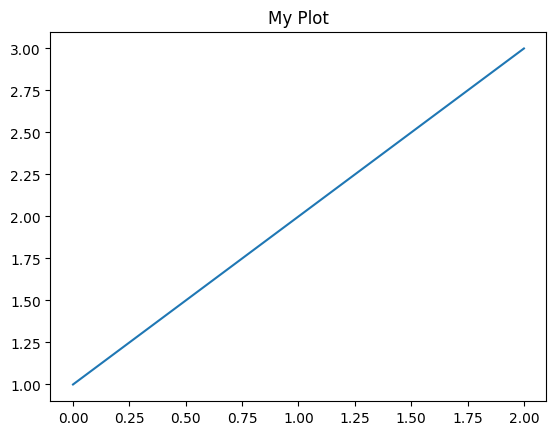

In [11]:
# Create an array (think of it as a fancy list) using numpy
data = np.array([1, 2, 3])     # np.array() creates a numpy array [object]

# Plot this data using matplotlib
fig, ax = plt.subplots()       # Create a figure and axis [object]
ax.plot(data)                  # ax.plot() is a method of the [object] ax
ax.set_title('My Plot')        # ax.set_title() adds a title to the plot
fig.show()                     # fig.show() displays the plot


Don't worry if you don't understand everything at first. The key is to recognize these patterns:
- `something.another_thing()`: This means "do an action"
- `something.another_thing`: This means "get some information"


## Problem 1: Arrays


### Problem 1(a): Creating Matrices

Create the following matrices using [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

$D = \begin{bmatrix}
2 & 6 & -3 \\
3 & 9 & -1
\end{bmatrix}$

$E = \begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}$

$F = \begin{bmatrix}
-5 & 5 \\
5 & 3
\end{bmatrix}$


In [24]:
# Create your matrices D, E, and F here
""" TODO: WRITE YOUR CODE BELOW """
D = np.array([[2,6,-3], [3,9,-1]])
E = np.array([[1,2],[3,4]])
F = np.array([[-5,5],[5,3]])
""" END OF TODO """
mats_q1a = (D, E, F) # NOTE: do not change this line


In [26]:
# Run this cell to check your solution
grader.check("q1a")


q1a results: All test cases passed!

### Problem 1(b): Matrix Slicing

Extract the following 2x2 matrix $G$ from $D$ using array slicing.

$G = \begin{bmatrix}
2 & 6 \\
3 & 9
\end{bmatrix}$

*Hint: NumPy arrays can be sliced using [`array[row_range, col_range]`](https://numpy.org/doc/stable/user/basics.indexing.html).*


In [31]:
# Create matrix G by slicing D
""" TODO: WRITE YOUR CODE BELOW """
G = D[:,0:2]
""" END OF TODO """
mats_q1b = G # NOTE: do not change this line


In [32]:
# Run this cell to check your solution
grader.check("q1b")


q1b results: All test cases passed!

### Problem 1(c): Block Diagonal Matrix

Create the following matrix $H$ using the matrices $E$, $F$, and $G$:

$H = \begin{bmatrix}
2 & 6 & 0 & 0 & 0 & 0 \\
3 & 9 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 2 & 0 & 0 \\
0 & 0 & 3 & 4 & 0 & 0 \\
0 & 0 & 0 & 0 & -5 & 5 \\
0 & 0 & 0 & 0 & 5 & 3
\end{bmatrix}$

*Hint: Look into [`scipy.linalg.block_diag()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.block_diag.html) for combining matrices in a block diagonal pattern.*


In [33]:
D

array([[ 2,  6, -3],
       [ 3,  9, -1]])

In [ ]:
# Create matrix H using block_diag
""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """
mats_q1c = H # NOTE: do not change this line


In [ ]:
# Run this cell to check your solution
grader.check("q1c")


## Problem 2: Plotting

Create a plot of $\sin(x)$ and $\cos(x)$ between $x = -3\pi$ and $x = +3\pi$ on the same graph. Your plot should have:
1. Both sine and cosine curves in different colors
2. A legend identifying each curve
3. X-axis label 'x'
4. Y-axis label 'y'
5. Title 'Sine and Cosine Functions'
6. Grid lines

*Hint: Use [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create evenly spaced points for x.*


In [ ]:
# Create your data here
# Use these exact variable names:
# x: for x values
# y_sin: for sine values
# y_cos: for cosine values

""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """

# Create your plot here
fig, ax = plt.subplots(figsize=(10, 6))
""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """

data_q2 = (x, y_sin, y_cos) # NOTE: do not change this line
ax_q2 = ax # NOTE: do not change this line

# FIXME: Autograder is currently unavailable for this question


## Problem 3: Functions

Write a function `compute_series_remainder(n)` that computes the remainder term of the series
$\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}$, i.e.,
your function should compute:

$$R(n) = \frac{\pi^2}{6} - \sum_{k=1}^{n} \frac{1}{k^2}$$


In [ ]:
def compute_series_remainder(n):
    """
    Compute the remainder term of the series sum(1/k^2) from k=1 to infinity.

    Args:
        n (int): Upper limit of the finite sum

    Returns:
        float: The remainder term R(n) = pi^2/6 - sum(1/k^2) from k=1 to n
    """

    # hint: constant pi can be accessed as np.pi
    """ TODO: WRITE YOUR CODE BELOW """

    """ END OF TODO """
    return R

# Test your function with n = 5
result = compute_series_remainder(5)
print(f"The remainder term for n = 5 is {result:.6f}")


In [ ]:
# Run this cell to check your solution
grader.check("q3")


## Problem 4: RLC Circuit

We will now consider a simple series combination of three passive electrical elements: a resistor, an inductor, and a capacitor, known as an RLC Circuit.

![RLC Circuit](https://yi-ju.me/host_files/ce295-sp25/hw0/RLC.png)

Since this circuit is a single loop, each node only has one input and output; therefore, application of [Kirchoff's current law](https://en.wikipedia.org/wiki/Kirchhoff%27s_circuit_laws#Kirchhoff's_current_law) shows that the current is the same throughout the circuit at any given time, $i(t)$.

Now applying [Kirchoff's voltage law](https://en.wikipedia.org/wiki/Kirchhoff%27s_circuit_laws#Kirchhoff's_voltage_law) around the loop and using the sign conventions indicated in the diagram, we arrive at the following governing equation.
$$
V(t) - L \frac{di}{dt} - R i - \frac{1}{C} \int i dt = 0
$$

We note that that the governing equation for the RLC circuit is a so-called **second order system**, *to be explained in lecture*. The state-space representation is found by choosing the charge $q$ and current $i$ as the state variables:

$$
\mathbf{x} = \left[ \begin{array}{c} q \\ i \end{array}\right]
$$

where, $q = \int i dt$.

The governing equations are:

$\dot{\mathbf{x}} = \begin{bmatrix} i \\ \frac{di}{dt} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -\frac{1}{LC} & -\frac{R}{L} \end{bmatrix} \begin{bmatrix} q \\ i \end{bmatrix} + \begin{bmatrix} 0 \\ \frac{1}{L} \end{bmatrix} V(t)$

$y = \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} q \\ i \end{bmatrix}$


### Problem 4(a): Circuit Parameters

Assign the following numerical values:
- $R = 0.2 \Omega$
- $L = 1 \text{H}$
- $C = 1 \text{F}$


In [ ]:
# Assign the circuit parameters
""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """
param_q4a = (R, L, C) # NOTE: do not change this line


In [ ]:
# Run this cell to check your solution
grader.check("q4a")


### Problem 4(b): System Matrices

The governing equations take the form of $\dot{\mathbf{x}} = \textbf{A} \textbf{x} + \textbf{B} V(t)$, and $y = \textbf{C} \textbf{x}$.

Use your variable definitions to compute matrices $\textbf{A}$, $\textbf{B}$, $\textbf{C}$ as `numpy` arrays.


In [ ]:
# Create the system matrices
# Use these exact variable names: A, B, C
""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """
mats_q4b = (A, B, C) # NOTE: do not change this line


In [ ]:
# Run this cell to check your solution
grader.check("q4b")


### Problem 4(c): State Space Model

Create a state-space model using [`scipy.signal.StateSpace`](https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.signal.StateSpace.html).
Name the system as `sys_q4` exactly.

*Hint: Include a feedforward matrix $D = 0$.*


In [ ]:
# Create the state space model
# Use these exact variable name: sys_q4
""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """

type(sys_q4)  # should be <class 'scipy.signal.StateSpace'>


In [ ]:
# Run this cell to check your solution
grader.check("q4c")


### Problem 4(d): System Simulation

Simulate the system response to a unit step input:
1. Create a time vector from 0 to 50 seconds with 0.01s step size
2. Create a unit step input, i.e., $V(t) = 1$.
3. Simulate the system using [`scipy.signal.lsim`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim).
4. Plot the results showing both current and charge. **Please follow the same plot formatting instructions in Q2**.


In [ ]:
# Simulate and plot the system
# Use these exact variable names:
# t: time vector
# V: input voltage
# y: output (current)
# x: state vector (charge and current)
# fig: figure object

# Create your simulation here
t = np.arange(0, 50, 0.01)
V = np.ones_like(t)

""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """

# Create your plot here
fig, ax = plt.subplots(figsize=(10, 6))
""" TODO: WRITE YOUR CODE BELOW """

""" END OF TODO """

data_q4d = (t, y, x) # NOTE: do not change this line
ax_q4d = ax # NOTE: do not change this line

# FIXME: Autograder is currently unavailable for this question


## Submission Guidelines

Before submitting your work, please follow these steps carefully:

1. **Restart and Run All**
   - Click: Runtime → Restart sessions and run all
   - Make sure all cells execute without errors, and verify that all test cases pass as expected.


In [ ]:
# Run this cell to check all your answers
grader.check_all()


2. **Submit Your Files**
   - **Jupyter Notebook**:
     - File → Download → Download .ipynb
     - Rename it to: `<lastname>-<firstname>_CE295_HW0.ipynb`
     - Submit to Gradescope under `HW0-ipynb`
   - **PDF Version**:
     - File → Print (Destination: Save as PDF) **Please check all cells & outputs are displayed clearly**
     - Rename it to: `<lastname>-<firstname>_CE295_HW0.pdf`
     - Submit to Gradescope under `HW0-pdf` and match pages to each (sub)questions.


## 🎉 Congratulations!

You have completed all the questions in HW 0! We hope that you have learned something new and useful from this assignment and **feel confident for the new semester**! Keep up the good work and we look forward to seeing you in the next assignment soon!
